## Dual Pol SAR Vegetation Index (DPSVI) (Periasamy, 2018)

Pré-processamento: Orbit File -> Calibration -> Speckle Filtering -> Terrain Correction -> DPSVI -> Spatial Subset

In [2]:
# Importações
# Bibliotecas básicas
import rasterio as rst
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
import math
import pandas as pd
from scipy.interpolate import interpn

In [3]:
# Importação da imagem preprocessada
with rst.open('E:/DPSVI/S1A_IW_GRDH_1SDV_20092020_preprocessed.tif', 'r') as image:
    VH = image.read(1)
    VV = image.read(2)

In [4]:
%matplotlib notebook

In [5]:
VH_flat = VH.flatten()
VV_flat = VV.flatten()
img_data = pd.DataFrame({'VH': VH_flat,'VV': VV_flat})

In [29]:
data , x_e, y_e = np.histogram2d(x_VV, y_VH, bins = 50, density = True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x_VV,y_VH]).T , method = "splinef2d", bounds_error = False)

<IPython.core.display.Javascript object>


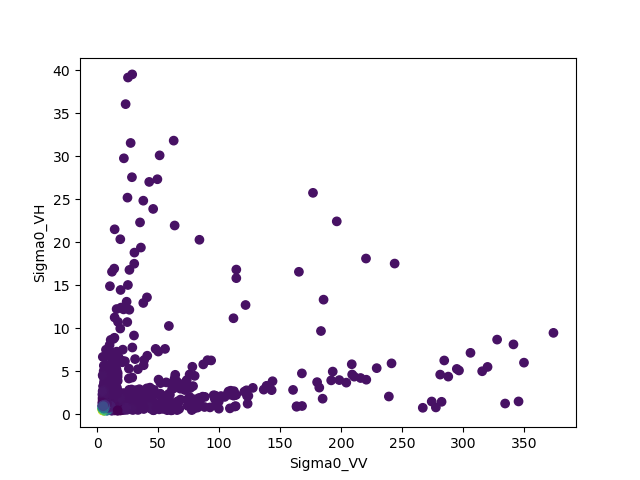

In [30]:
fig = plt.figure()
ax = fig.add_subplot()

x_VV = img_data['VV']
y_VH = img_data['VH']

ax.scatter(x_VV, y_VH, c=z)

ax.set_xlabel('Sigma0_VV')
ax.set_ylabel('Sigma0_VH')

plt.show()

In [31]:
print(f'VH_Max = {VH.max()}')
print(f'VH_min = {VH.min()}')
print()
print(f'VV_Max = {VV.max()}')
print(f'VV_min = {VV.min()}')

VH_Max = 42.45896911621094
VH_min = 0.0013504716334864497

VV_Max = 437.9499816894531
VV_min = 0.002170997206121683


<IPython.core.display.Javascript object>


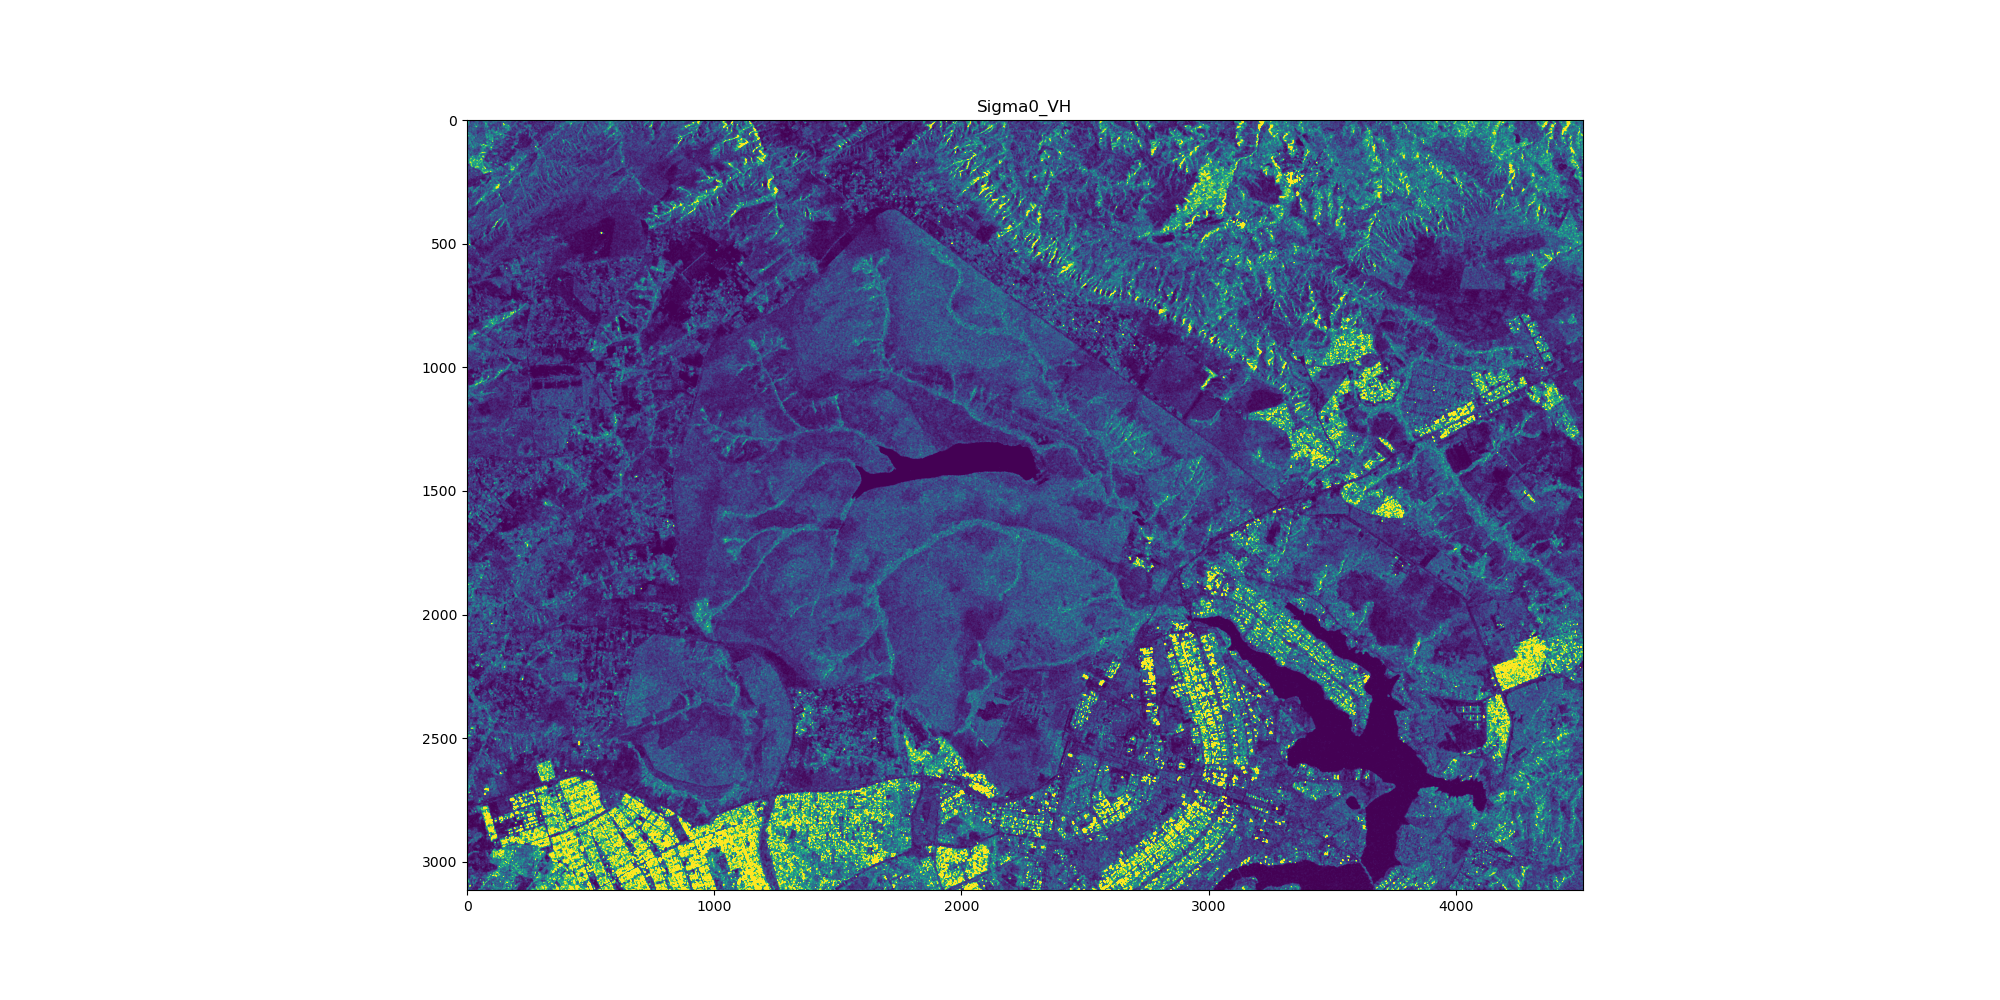

Text(0.5, 1.0, 'Sigma0_VH')

In [32]:
# Canal VH

fig = plt.figure(figsize=(20,10))
plt.imshow(VH, vmin=np.percentile(VH, 2), vmax=np.percentile(VH, 98))
plt.title('Sigma0_VH')

<IPython.core.display.Javascript object>


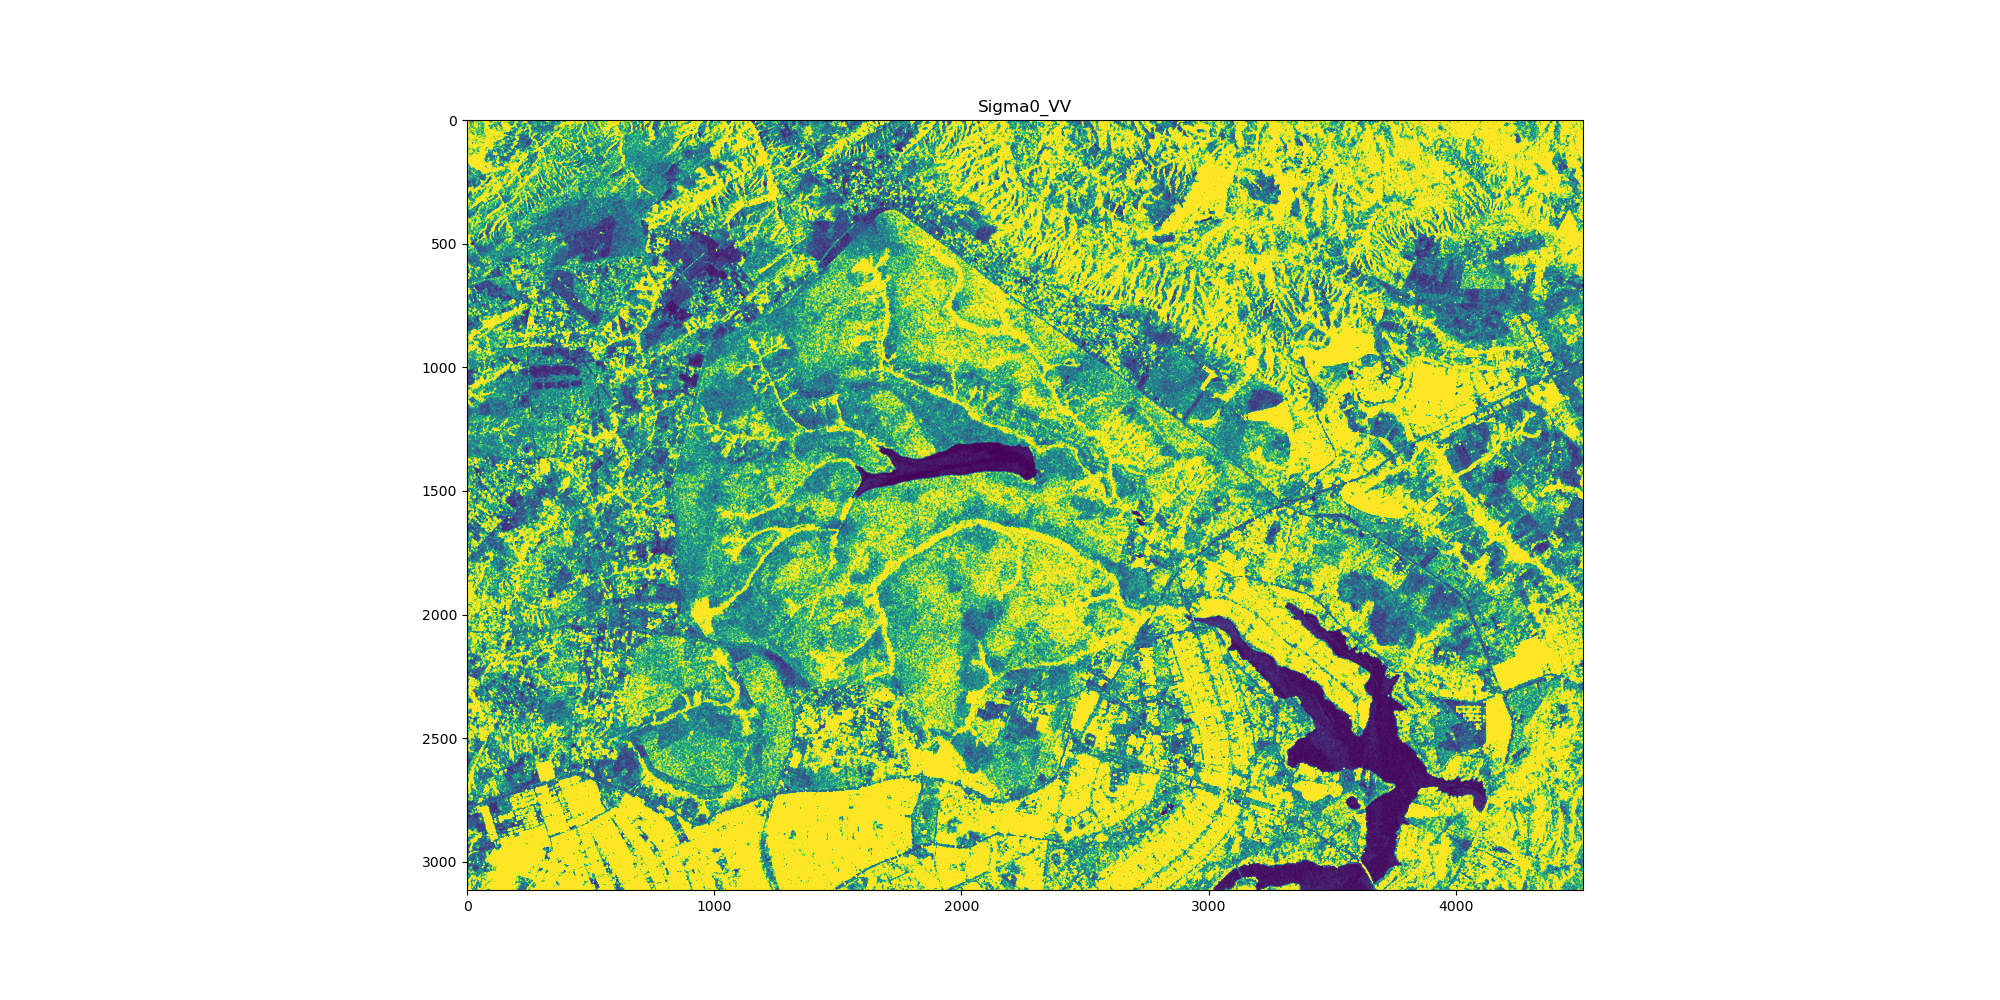

Text(0.5, 1.0, 'Sigma0_VV')

In [33]:
# Canal VV

fig = plt.figure(figsize=(20,10))
plt.imshow(VV, vmin=np.percentile(VH, 1), vmax=np.percentile(VH, 99))
plt.title('Sigma0_VV')

In [34]:
def DPSVI(VV, VH, VV_max):
    
    DPSVI = (VH*((VV_max*VH) - (VV*VH) + (VH*VH)) + ((VV_max*VV) - (VV*VV) + (VH*VV))) / (math.sqrt(2) * VV)
    
    return DPSVI

In [35]:
teste = DPSVI(VV, VH, 14)

<IPython.core.display.Javascript object>


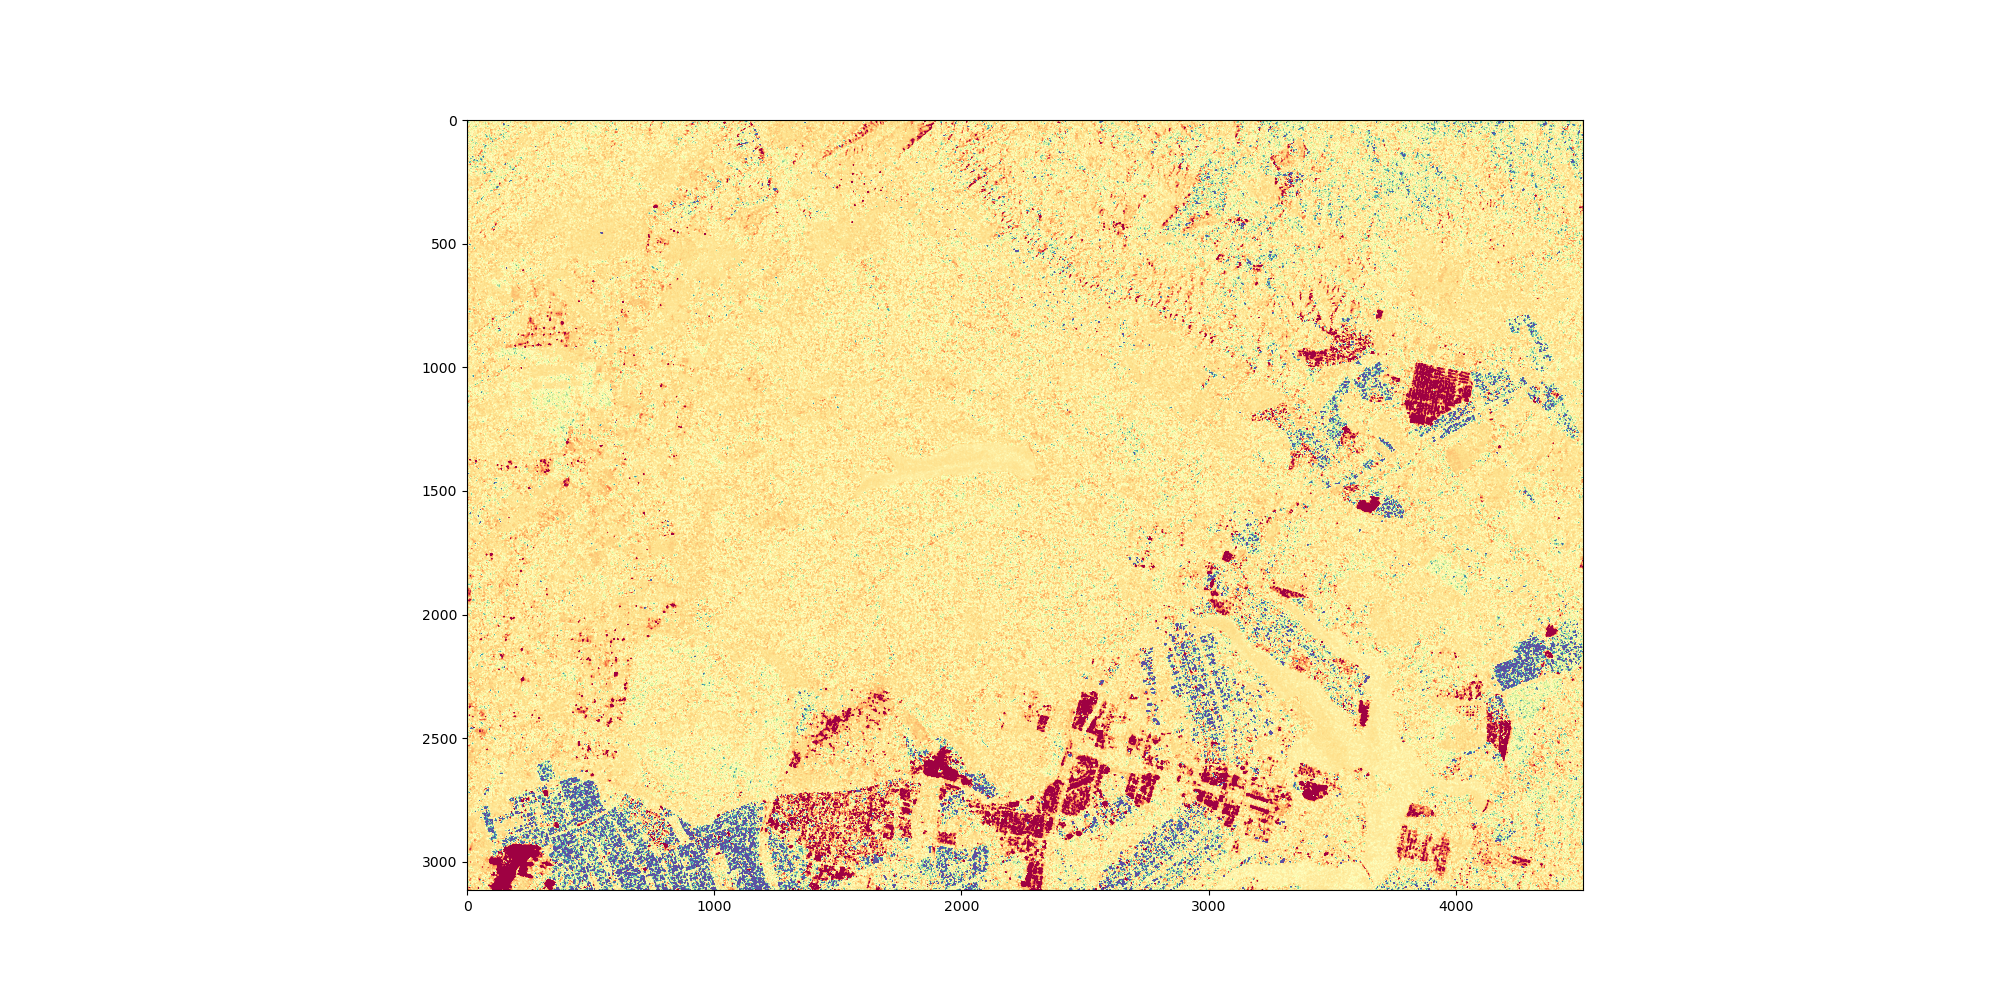

In [36]:
fig = plt.figure(figsize=(20,10))
plt.imshow(teste, cmap='Spectral', vmin=np.percentile(teste, 2), vmax=np.percentile(teste, 98))